In [16]:
from os_utilities import make_folder

from orb_builder import *
import soap_utilities as su
import report_parser as rp
import slice_analysis_nx as sanx # network x based
import slice_analysis as sagt # graph-tools based
from distances_tvg import *
from matrix import *
from ml_knn import *
from tle_utilities import starlink_exclude

from tqdm import tqdm
from datetime import datetime
import itertools

import networkx as nx

import tikzplotlib


In [4]:
folder_base = f"./outputs/experiments"
make_folder(folder_base)

date = datetime.now()
date = datetime.strptime("01/08/22 00:00", "%d/%m/%y %H:%M")

starlink = build_satellites_csv("starlink")
exclude_list = starlink_exclude(date, 200, 800)
starlink = list(filter(lambda sat : sat['object_name'] not in exclude_list, starlink))

moon_sats = get_moon_platforms()
mars_sats = get_mars_platforms()
ground = [
    create_ground_object_dictionary("Ground-Albany", 42.685012663456163, -73.82479012295363, 0),
    create_ground_object_dictionary("Ground-Sydney", -33.868888888888889, 151.20939697339508, 0)
]
norad = build_satellites_from_tle("./sources/tdrss.tle")

def generate_orb_files(folder_name, name, satellites, date):
        save_to_outputs_file(
                generate_orb(satellites, name, date),
                f"experiments/{folder_name}/{name}", "orb")
        return name + ".orb"

In [5]:
n = 50

print(f"Running Lifetime Matrix Simulations on Date = {date}")

folder_name = f"starlink-{n}-sat-single"
# folder_name = f"lt-starlink-{n}-sat-single"
make_folder(f"{folder_base}/{folder_name}")

print(f"Generating ORB File")

name = f"starlink_{date.strftime('%Y-%m')}"
# orb_filename = generate_orb_files(
#     folder_name, 
#     name, 
#     sample_sats(starlink, n),
#     date)
orb_filename = "starlink_2022-08.orb"
# orb_filename = "starlink_2023-04_2.orb"

orb_path = f"{folder_base}/{folder_name}/{orb_filename}"

print("Running SOAP on ORB file")
# su.run_soap_mac([orb_path], max_workers=10)

Running Lifetime Matrix Simulations on Date = 2022-08-01 00:00:00
Generating ORB File
Running SOAP on ORB file


Constructing Matrices from ORB Files
orb_path = ./outputs/experiments/starlink-50-sat-single/starlink_2022-08.orb


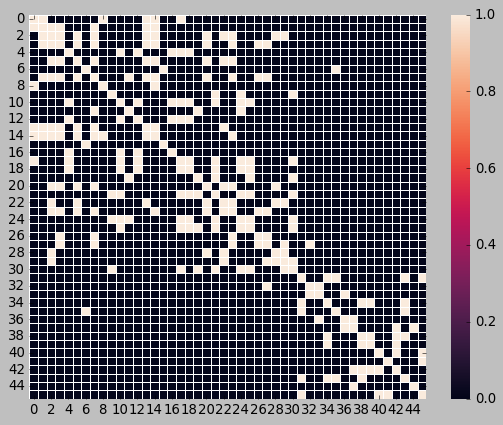

A is a 46x46 Matrix


In [17]:
print(f"Constructing Matrices from ORB Files")
print(f"orb_path = {orb_path}")

import seaborn as sns

filepath = orb_path.replace(".orb", " Contact Analysis.csv")

matrix = rp.soap_converter(filepath)
a_matrix = matrix.get_slice_at(71248.109)
ax = sns.heatmap(a_matrix, linewidth=0.5)
tikzplotlib.save(f"{folder_base}/adj_matrix_heat_{n}_sats_today_0.tex")
plt.show()


# A = matrix.thicken_matrix(1)
A = matrix
B = IntervalMatrix.complete_matrix(matrix.dim_row)
m = matrix.dim_row

# matrix_raw_sym = [
#     [P.open(0,20), P.closed(0, 6), P.closed(6, 10), P.empty()],
#     [P.closed(0, 6), P.open(0, 20), P.closed(1, 4), P.closed(3, 7)],
#     [P.closed(6, 10), P.closed(1, 4), P.open(0, 20), P.closed(0, 8)],
#     [P.empty(), P.closed(3, 7), P.closed(0, 8), P.open(0, 20)]
# ]
# # matrix = IntervalMatrix(4, 4, matrix_raw)
# matrix = IntervalMatrix(4, 4, matrix_raw_sym)
# m = matrix.dim_row
# A = matrix

print(f"A is a {m}x{m} Matrix")

# plt.style.use('classic')
# plt.grid(True)



Calculating Walks
Calculating Walks a 50-Satellite System
  Calculating 1-Walks for a 50-Sat system


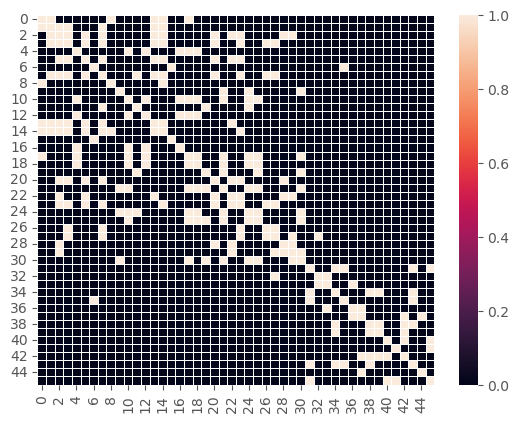

  Calculating 2-Walks for a 50-Sat system


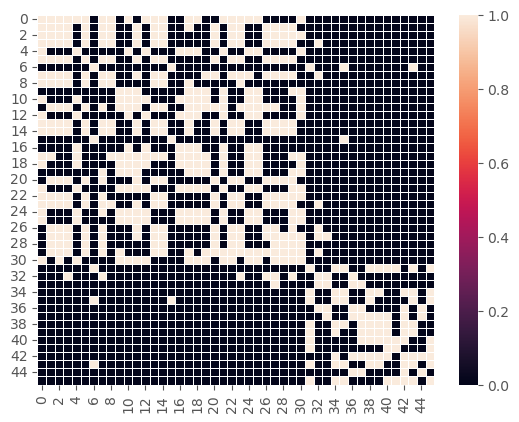

  Calculating 3-Walks for a 50-Sat system


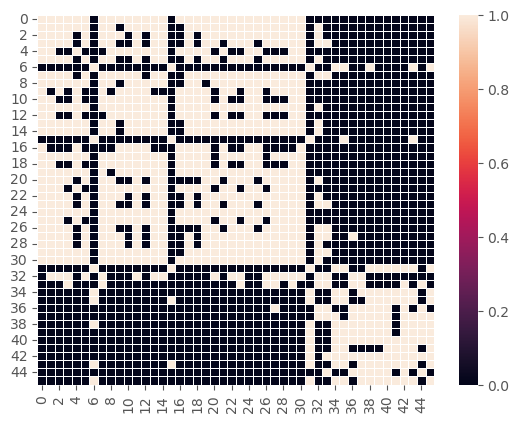

  Calculating 4-Walks for a 50-Sat system


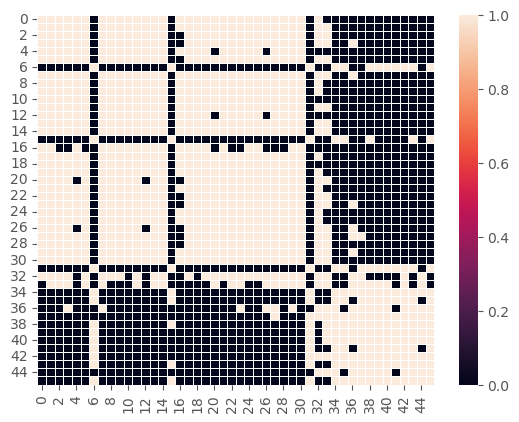

  Calculating 5-Walks for a 50-Sat system


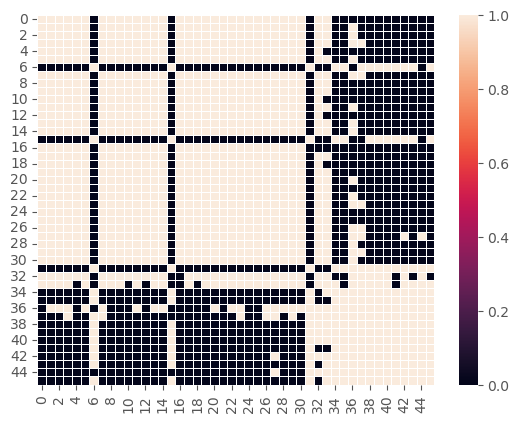

  Calculating 6-Walks for a 50-Sat system


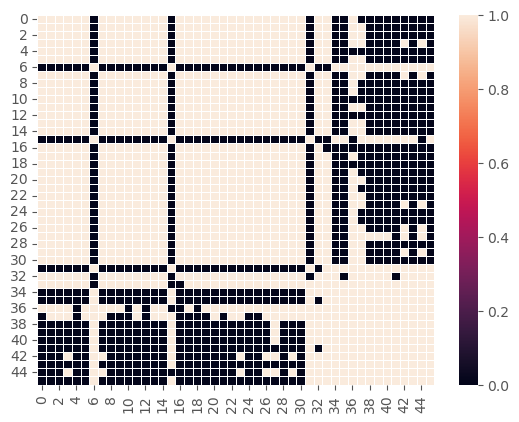

  Calculating 7-Walks for a 50-Sat system


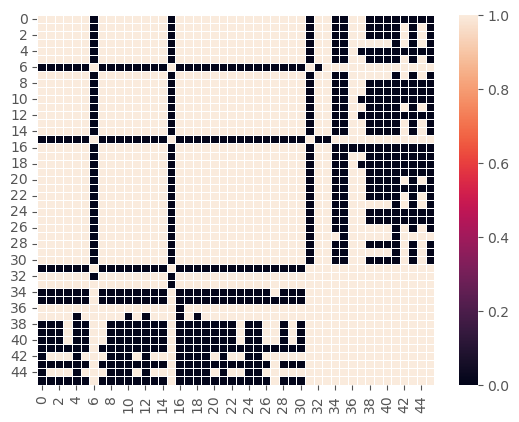

  Calculating 8-Walks for a 50-Sat system


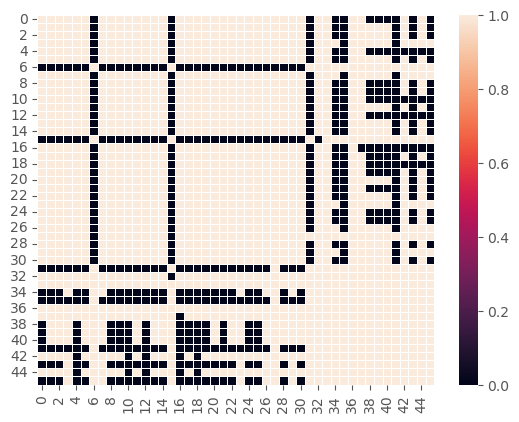

  Calculating 9-Walks for a 50-Sat system


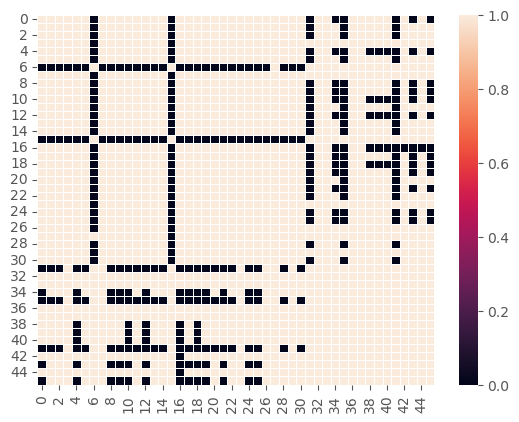

  Calculating 10-Walks for a 50-Sat system


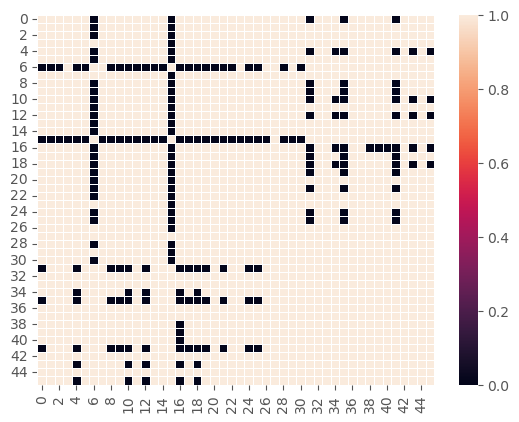

  Calculating 11-Walks for a 50-Sat system


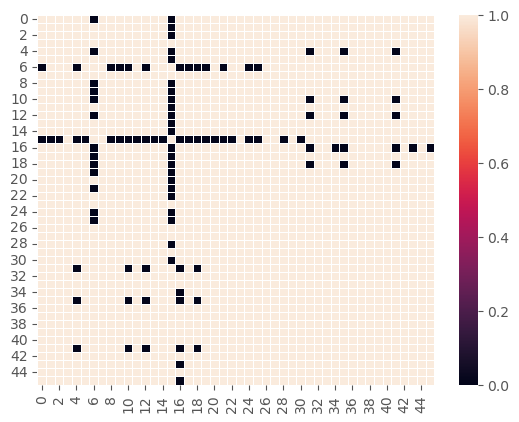

  Calculating 12-Walks for a 50-Sat system


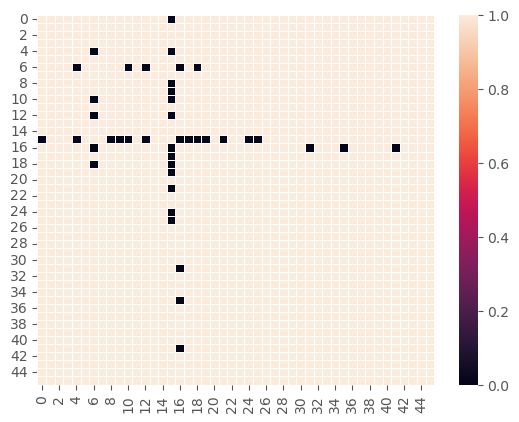

  Calculating 13-Walks for a 50-Sat system


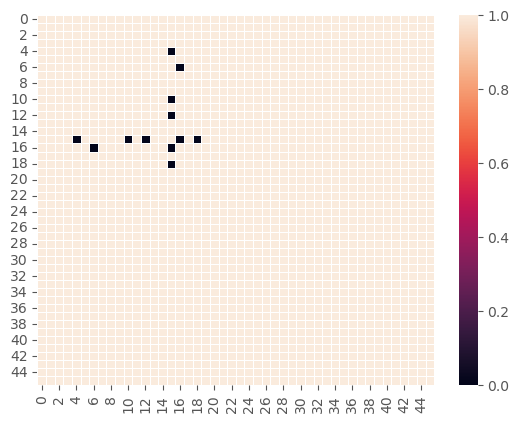

  Calculating 14-Walks for a 50-Sat system


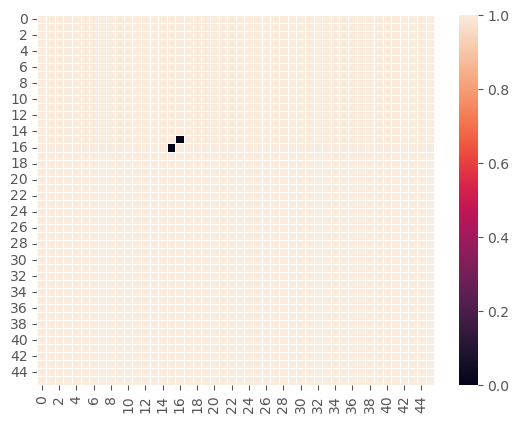

  Calculating 15-Walks for a 50-Sat system


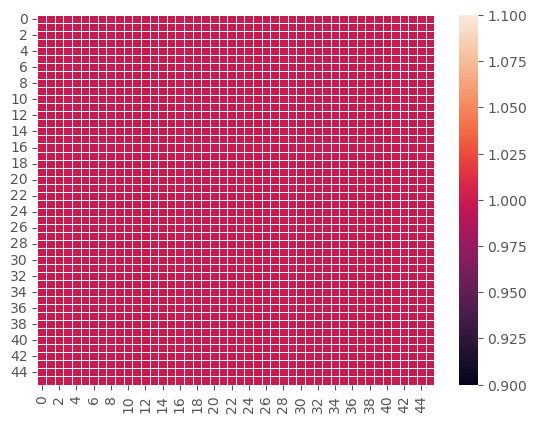

  Calculating 16-Walks for a 50-Sat system


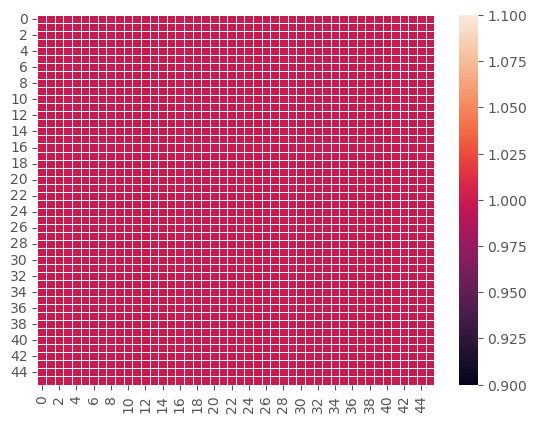

  Calculating 17-Walks for a 50-Sat system


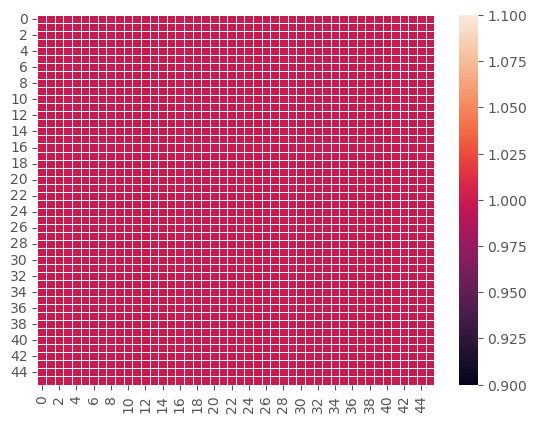

  Calculating 18-Walks for a 50-Sat system


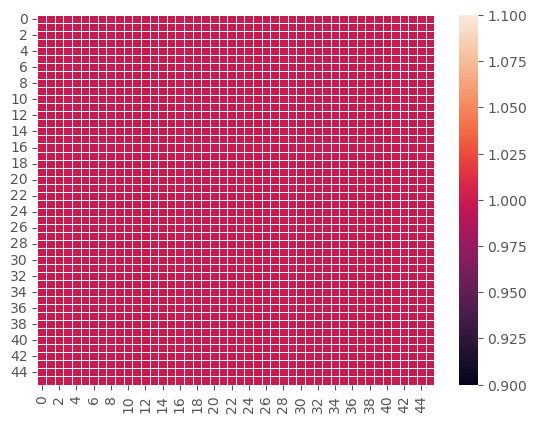

  Calculating 19-Walks for a 50-Sat system


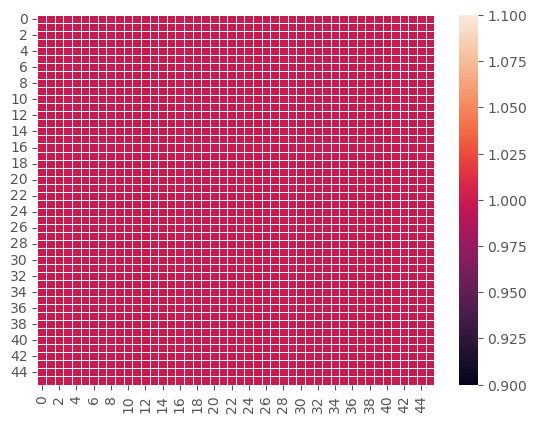

In [7]:
print(f"Calculating Walks")

import seaborn as sns

start_time, end_time = 0, 86400
walk_length = 20

walks = [IntervalMatrix.identity_matrix(m)]

print(f"Calculating Walks a {n}-Satellite System")
# A1 = A.copy()
A1 = A
A2 = A
A3 = A
for k in range(1, walk_length):
    print(f"  Calculating {k}-Walks for a {n}-Sat system")
    if k == 1:
        A_k = A
    else:
        A_k = A * walks[-1]
    a_matrix = A1.get_slice_at(71248.109)

    A2 = A2 * A3
    A1 = A1 + A2

    # star = walks[0]
    # for B in walks[1:]:
    #     star = star + B
    

    ax = sns.heatmap(a_matrix, linewidth=0.5)
    plt.show()

    # print(f"    A^{k}[30][37]={A_k[30, 37]}")
    # print(f"    A^*,{k}[30][37]={star[30, 37]}")

    # print(A_k)

    walks.append(A_k)

In [8]:
# Calculating Distances
print(f"Calculating Lifetime Matrix")

# Lifetime Matrix
L = tvg_lifetime_matrix(walks, start_time, end_time, walk_length)

y_list = generate_y_list(L, m, walk_length)
y_list_average = calculate_y_list_average(y_list, walk_length)
lifetime_list = y_list_average
print(lifetime_list)

Calculating Lifetime Matrix
[0.0, 0.0, 10784.963856038652, 25923.98844541064, 42125.718719806784, 54811.98696618366, 63515.26537874406, 70043.74510338157, 74481.48954975845, 77047.11936425124, 78231.65277874404, 78732.93574396144, 78933.36894299519, 79007.26349855078, 79025.79704734306, 79026.62372657012, 79026.65691594209, 79026.65691594209, 79026.65691594209, 79026.65691594209]


Plotting Lifetime Curve


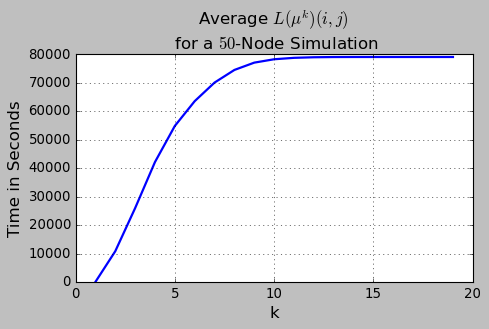

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [15]:
# Plot Lifetime Distances and Confidence Intervals
print(f"Plotting Lifetime Curve")

x = list(range(1, walk_length))

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 4))

axs.set_title(f"Average $L(\mu^k)(i, j)$ \n for a ${n}$-Node Simulation", fontsize=15)
axs.plot(x, lifetime_list[1:], linewidth=2)

axs.set_xlabel("k", fontsize=15)
axs.set_ylabel("Time in Seconds", fontsize=15)

# Hide x labels and tick labels for top plots and y ticks for right plots.
axs.label_outer()

plt.style.use('classic')
plt.grid(True)
tikzplotlib.save(f"{folder_base}/average_lifetime_matrix_{n}_sats_today.tex")

plt.savefig(f"{folder_base}/average_lifetime_matrix_{n}_sats_today.png")
plt.show()

print(plt.style.available)

In [12]:
# Slice Analysis
print(f"Calculating Slice Analysis")
print(f"orb_path = {orb_path}")

filepath = orb_path.replace(".orb", " Contact Analysis.csv")

contact_plan = rp.contact_analysis_parser(filepath)
tvg = rp.construct_graph(contact_plan, delta = 1)
# critical_times[i][j] = rp.extract_critical_times(graph)
critical_times = rp.extract_critical_times(tvg)
sample_times = rp.sample_critical_times(critical_times)

print(f"Number of Critical Times {len(critical_times)}")

disconnected_counter = 0
diameters = []

# sample_times = []
for k, time in enumerate(sample_times):
    graph = sanx.get_graph_slice_at(tvg, time)
    print(f"{k} : time={time}")

    diameter = -1
    for sg in [graph.subgraph(c).copy() for c in nx.connected_components(graph)]:
        diameter = max(diameter, nx.diameter(sg))
        periphery = nx.periphery(sg)
        # print(f"Periphery has length {len(periphery)}")
        if len(periphery) > 1:
            print(periphery)
            n1 = periphery[0]
            n2 = periphery[1]
            diameter_nodes = nx.shortest_path(sg, source = n1, target = n2)
            # print(diameter_nodes)
            print(f"  Diameter={nx.diameter(sg)}; len(periphery)={len(periphery)}, path={diameter_nodes}")
        else:
            print("  Periphery has only one element.")

    if nx.number_connected_components(graph) > 1:
        print(f"  slice has {nx.number_connected_components(graph)} components")
        disconnected_counter += 1

    diameters.append(diameter)

print(f"Has {disconnected_counter} disconnected slices;")
print(f"NX : {n}-sats : max={max(diameters)} (out of {len(sample_times)} slices)")


Calculating Slice Analysis
orb_path = ./outputs/experiments/starlink-50-sat-single/starlink_2022-08.orb
Number of Critical Times 3598
0 : time=2.365
[3, 8, 40]
  Diameter=7; len(periphery)=3, path=[3, 41, 16, 21, 11, 1, 0, 8]
1 : time=5.531000000000001
[3, 8, 40]
  Diameter=7; len(periphery)=3, path=[3, 41, 16, 21, 11, 1, 0, 8]
2 : time=17.008499999999998
[3, 8, 40]
  Diameter=7; len(periphery)=3, path=[3, 41, 16, 21, 11, 1, 0, 8]
3 : time=27.9065
[0, 8, 41]
  Diameter=8; len(periphery)=3, path=[0, 8]
4 : time=38.1285
[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 23, 24, 26, 29, 31, 34, 35, 40, 41, 44, 45]
  Diameter=6; len(periphery)=29, path=[0, 1]
5 : time=54.1085
[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 23, 24, 26, 29, 31, 34, 35, 40, 41, 44, 45]
  Diameter=6; len(periphery)=29, path=[0, 1]
6 : time=68.6405
[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 23, 24, 26, 29, 31, 34, 35, 37, 40, 41, 42, 44, 45]
  Diameter=6; len

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


46
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


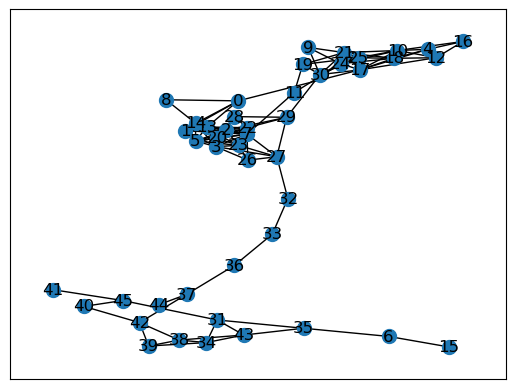

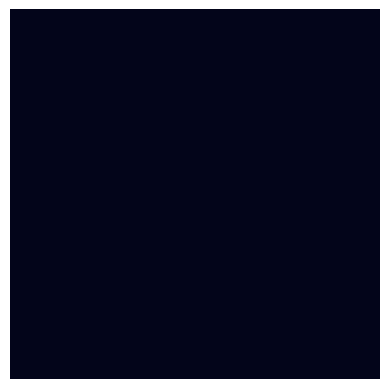

In [33]:
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation

def init(m):
    return sns.heatmap(np.zeros((m, m)), vmax=.8, square=True, cbar=False, xticklabels=False, yticklabels=False)

def animate(data_list, i):
    data = data_list[i]
    return sns.heatmap(data, vmax=.8, square=True, cbar=False, xticklabels=False, yticklabels=False)

data_list = []

contact_plan = rp.contact_analysis_parser(filepath)
tvg = rp.construct_graph(contact_plan, delta = 1)
graph = sanx.get_graph_slice_at(tvg, 71248.109)
# print(graph)
nx.draw_networkx(graph, pos=nx.spring_layout(graph), with_labels=True, node_size=100)
# nx.draw_networkx_labels(graph, pos=nx.spring_layout(graph))

a_matrix = nx.adjacency_matrix(graph)
"""
for k in range(1, walk_length):
    print(f"{k}-walks")

    A_k = a_matrix.copy()
    a_dummy = a_matrix.copy()
    for i in range(k):
        A_k = A_k @ a_matrix
        a_dummy = A_k + a_dummy
        for j1 in range(0,len(A)):
            for j2 in range 0, len(A):
                if a_dummy[i][j] > 1:
                    a_dummy[i][j] = 1
"""
a_matrix = (a_matrix).todense()
print(len(a_matrix))
k=25
A_k = a_matrix.copy()
a_dummy = a_matrix.copy()
data_list = [a_dummy]
# ax = sns.heatmap(a_matrix, linewidth=0.5)
# plt.show()
for i in range(1, k):
    print(i)
    A_k = A_k @ a_matrix
    a_dummy = A_k + a_dummy
    for j1 in range(0,m):
        for j2 in range (0, m):
            if a_dummy[j1][j2] >= 1:
                a_dummy[j1][j2] = 1
            else: 
                a_dummy[j1][j2] = 0
    data_list.append(a_dummy)
        

    # print(a_matrix**k)
    # print(f"Does A_k == A_(k - 1) : {a_matrix**(k - 1) == a_matrix**k}")

    # ax = sns.heatmap(a_dummy, linewidth=0.5)
    # plt.show()
fig = plt.figure()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=14, repeat = False)

savefile = r"test3.gif"
pillowwriter = animation.PillowWriter(fps=5)
anim.save(savefile, writer=pillowwriter)

# plt.show()

# ax = sns.heatmap((a_matrix).todense(), linewidth=0.5)
# plt.show()

# ax = sns.heatmap((a_matrix @ a_matrix).todense(), linewidth=0.5)
# plt.show()

# # print(a_matrix.todense())
# a_matrix = a_matrix.todense()
# for i in range(m):
#     for j in range(m):
#         pass
#         print(f"{i}, {j} : {a_matrix[i, j]}")



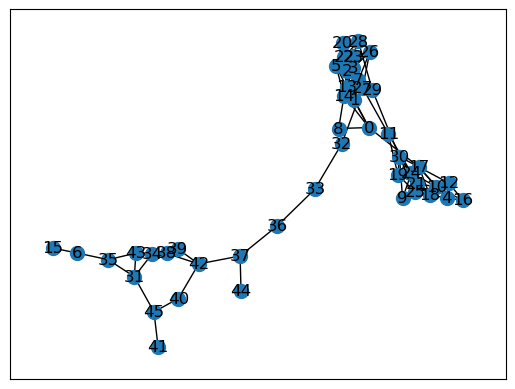

In [28]:
graph = sanx.get_graph_slice_at(tvg, 71248.109)
# print(graph)
nx.draw_networkx(graph, pos=nx.spring_layout(graph), with_labels=True, node_size=100)
# nx.draw_networkx_labels(graph, pos=nx.spring_layout(graph))

In [88]:
from sgp4 import omm
from sgp4.api import jday
# from astropy.coordinates import ITRS, TEME, CartesianDifferential, CartesianRepresentation
# from astropy import units as u
# from astropy.time import Time

EARTH_RADIUS = 6367 # KM

def starlink_exclude(date, dist_min, dist_max):
    """
    Returns a list of starlink satellites to exclude if they are not within 
        the range [dist_min, dist_max] given in km.
    """
    jd, fr = jday(date.year, date.month, date.day, date.hour, date.minute, date.second)

    starlink_omm = []
    with open("./sources/starlink.csv") as f:
        for entry in omm.parse_csv(f):
            starlink_omm.append(entry)
    
    exclude_list = []
    for entry in starlink_omm:
        sat_name = entry['OBJECT_NAME']

        sat = Satrec()
        omm.initialize(sat, entry)

        e, r, v = sat.sgp4(jd, fr)
        height = np.sqrt(np.sum(np.asarray(r)**2)) - EARTH_RADIUS
        # print(f"{sat_name} height is {height}")
        if height <= dist_min or height >= dist_max:
            # print(f"excluding {sat_name} with height {height}")
            exclude_list.append(sat_name)

    return exclude_list

print(f"len(starlink_exclude) = {len(starlink_exclude(date, 200, 800))}")

date = datetime.strptime("01/08/22 00:00", "%d/%m/%y %H:%M")

# jd, fr = jday(date.year, date.month, date.day, date.hour, date.minute, date.second)

# t = Time(jd, format="jd")

starlink_omm = []
with open("./sources/starlink.csv") as f:
    for entry in omm.parse_csv(f):
        starlink_omm.append(entry)
print(starlink_omm[0])

exclude_list = []

for entry in starlink_omm:
    sat_name = entry['OBJECT_NAME']

    sat = Satrec()
    omm.initialize(sat, entry)
    # error_code, teme_p, teme_v = sat.sgp4(t.jd1, t.jd2)
    # teme_p = CartesianRepresentation(teme_p * u.km)
    # teme_v = CartesianDifferential(teme_v * u.km / u.s)
    # teme = TEME(teme_p.with_differentials(teme_v), obstime=t)

    e, r, v = sat.sgp4(jd, fr)
    height = np.sqrt(np.sum(np.asarray(r)**2)) - EARTH_RADIUS
    # print(f"{entry['OBJECT_NAME']} height is {height}")
    if height <= 200 or height >= 800:
        # print(f"excluding {sat_name} with height {height}")
        exclude_list.append(sat_name)
print(exclude_list)
print(f"len(exclude_list) = {len(exclude_list)}")

    # itrs_geo = teme.transform_to(ITRS(obstime=t))
    # location = itrs_geo.earth_location
    # print(location.geodetic.height)
starlink = build_satellites_csv("starlink")

print(len(starlink))
print(starlink[0])

filtered = list(filter(lambda sat : sat['object_name'] not in exclude_list, starlink))
print(len(filtered))

len(starlink_exclude) = 240
{'OBJECT_NAME': 'STARLINK-24', 'OBJECT_ID': '2019-029D', 'EPOCH': '2022-05-16T15:42:13.919328', 'MEAN_MOTION': '15.30333470', 'ECCENTRICITY': '.0005053', 'INCLINATION': '53.0080', 'RA_OF_ASC_NODE': '259.1168', 'ARG_OF_PERICENTER': '291.2369', 'MEAN_ANOMALY': '68.8090', 'EPHEMERIS_TYPE': '0', 'CLASSIFICATION_TYPE': 'U', 'NORAD_CAT_ID': '44238', 'ELEMENT_SET_NO': '999', 'REV_AT_EPOCH': '16335', 'BSTAR': '.31164E-2', 'MEAN_MOTION_DOT': '.93528E-3', 'MEAN_MOTION_DDOT': '0'}
['STARLINK-1214', 'STARLINK-1322', 'STARLINK-1809', 'STARLINK-1874', 'STARLINK-1885', 'STARLINK-2023', 'STARLINK-2306', 'STARLINK-2239', 'STARLINK-3096', 'STARLINK-3260', 'STARLINK-3312', 'STARLINK-3366', 'STARLINK-3350', 'STARLINK-3176', 'STARLINK-3362', 'STARLINK-3344', 'STARLINK-3173', 'STARLINK-3374', 'STARLINK-3372', 'STARLINK-3375', 'STARLINK-3397', 'STARLINK-3243', 'STARLINK-3391', 'STARLINK-3394', 'STARLINK-3390', 'STARLINK-3398', 'STARLINK-3399', 'STARLINK-3373', 'STARLINK-3392', 'ST

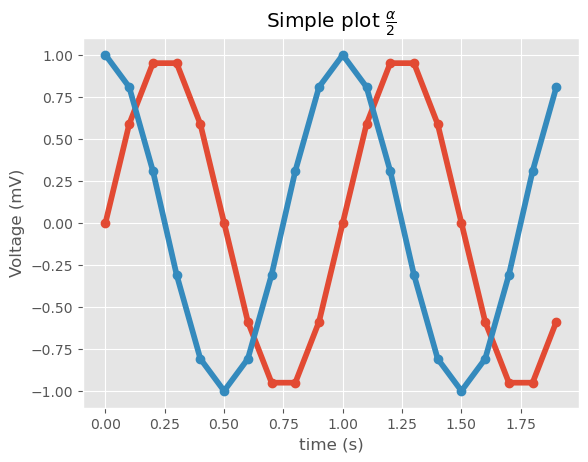

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

plt.style.use("ggplot")

t = np.arange(0.0, 2.0, 0.1)
s = np.sin(2 * np.pi * t)
s2 = np.cos(2 * np.pi * t)
plt.plot(t, s, "o-", lw=4.1)
plt.plot(t, s2, "o-", lw=4.1)
plt.xlabel("time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Simple plot $\\frac{\\alpha}{2}$")
plt.grid(True)

import tikzplotlib

tikzplotlib.save("test.tex")